In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [16]:
data=pd.read_excel('data/TextDataWithIDs.xlsx')

In [5]:
data["text"] = data["text"].apply(lambda x: str(x))

In [6]:
data["text"] = data["text"].apply(lambda x: x.replace("_", " "))

In [17]:
text_data = data["text"]

In [8]:
# text_data = data.iloc[:,3:4] 

In [12]:
#text_data = text_data.dropna()

In [18]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.5,
#     max_features = 3000,
    stop_words = 'english'
)
tfidf.fit(data['text'])
text = tfidf.transform(data['text'])

In [19]:
tfidf.get_feature_names()

['a1c',
 'ada',
 'added',
 'adherence',
 'agreement',
 'ambulatory',
 'analysis',
 'appropriate',
 'asked',
 'available',
 'based',
 'believes',
 'benefit',
 'best',
 'better',
 'bi',
 'cardiology',
 'care',
 'ckd',
 'class',
 'clinic',
 'clinical',
 'commented',
 'comparison',
 'copd',
 'cost',
 'covid',
 'creating',
 'current',
 'currently',
 'cvd',
 'data',
 'decision',
 'deck',
 'developing',
 'device',
 'diabetes',
 'did',
 'different',
 'digital',
 'director',
 'discharge',
 'discovery',
 'discuss',
 'discussed',
 'discussion',
 'disease',
 'docuseries',
 'does',
 'dr',
 'drug',
 'education',
 'educational',
 'emperor',
 'emr',
 'endocrinology',
 'especially',
 'evidence',
 'expressed',
 'focus',
 'focused',
 'follow',
 'formulary',
 'future',
 'gold',
 'guideline',
 'guidelines',
 'health',
 'help',
 'heor',
 'hf',
 'home',
 'hospital',
 'hospitals',
 'impact',
 'implement',
 'implementation',
 'improve',
 'improvement',
 'improving',
 'including',
 'inertia',
 'information',
 '

In [26]:
print(text[0])

  (0, 184)	0.1298476670638875
  (0, 183)	0.13274877745067465
  (0, 182)	0.1359024639874024
  (0, 181)	0.14317567919775592
  (0, 179)	0.10916853634557928
  (0, 178)	0.1393569367386821
  (0, 175)	0.15228445274410934
  (0, 172)	0.15228445274410934
  (0, 171)	0.1359024639874024
  (0, 158)	0.15228445274410934
  (0, 135)	0.3045689054882187
  (0, 134)	0.15787157181310876
  (0, 126)	0.1359024639874024
  (0, 120)	0.3157431436262175
  (0, 115)	0.3601159203444024
  (0, 114)	0.17822269602762783
  (0, 100)	0.15228445274410934
  (0, 74)	0.2787138734773642
  (0, 72)	0.14317567919775592
  (0, 70)	0.2543233167633505
  (0, 68)	0.14317567919775592
  (0, 51)	0.259695334127775
  (0, 32)	0.14317567919775592
  (0, 21)	0.09834979801635058
  (0, 17)	0.08821637585526308
  (0, 14)	0.29488934013205487
  (0, 10)	0.10472487270145342


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


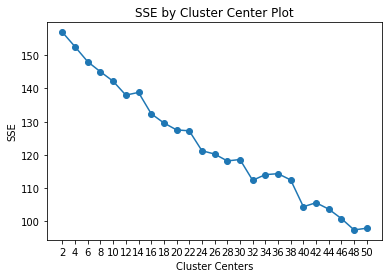

In [20]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=50, batch_size=50, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 50)

In [46]:
clusters = MiniBatchKMeans(n_clusters=12, init_size=50, batch_size=50, random_state=20).fit_predict(text)

In [47]:
clusterlist= clusters.tolist()

In [48]:
corpus=[]
for index,row in data.iterrows():
    corpus.append(row['text'])   

In [49]:
idea={'Idea':corpus, 'Cluster':clusterlist} #Creating dict having doc with the corresponding cluster number.

frame=pd.DataFrame(idea,index=[clusterlist], columns=['Idea','Cluster']) # Converting it into a dataframe.
print(frame['Cluster'].value_counts())

11    68
2     47
9     16
0     10
6      8
4      6
8      4
10     3
3      3
1      3
5      2
7      1
Name: Cluster, dtype: int64


In [60]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=170, replace=False)
    
    pca = PCA(n_components=10).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=10).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=50, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

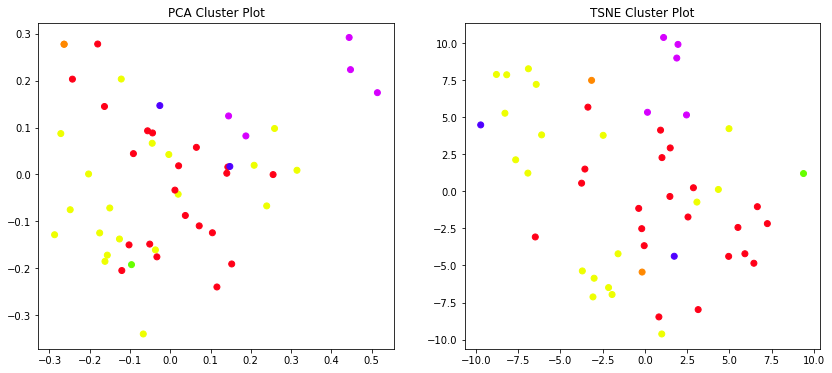

In [61]:
plot_tsne_pca(text, clusters)

In [52]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
including,added,sglt2,cardiology,endocrinology,spiriva,jardiance,respimat,inpatient,formulary

Cluster 1
pathway,data,including,presentation,reduced,drug,emperor,analysis,sub,renal

Cluster 2
diabetes,jardiance,use,total,looking,based,copd,care,cost,patients

Cluster 3
vs,management,clinic,wants,cardiology,interested,patient,resources,clinical,inertia

Cluster 4
guideline,population,future,like,teams,physicians,pathways,opportunity,especially,data

Cluster 5
decision,current,interested,providers,products,latest,ckd,data,sglt2i,trials

Cluster 6
care,discussed,needed,measure,shared,level,hospital,need,commented,pqa

Cluster 7
gold,guideline,guidelines,health,focus,dr,use,impact,device,learn

Cluster 8
health,respiratory,primary,population,copd,discussion,gold,outpatient,care,guidelines

Cluster 9
reduce,insight,follow,best,practices,people,readmissions,copd,quality,requested

Cluster 10
requested,review,discuss,wanted,stiolto,gold,available,set,heor,time

Cluster 11
treatment